Week-14
===

<Large>


```

   When I was young, no grief did cloud mine eye,
     Yet penned I woes as if my heart did sigh.
   Now Time hath etched its mark upon my face,
     Though strength remains, my codes find no embrace.  

  少年不知愁滋味，為賦新詞強說愁
  馬齒漸長力不滯，程式編碼空徒勞
               -- 切特•基匹梯

```


1. Chipotle dataset, Associate Rule Analysis
2. ...


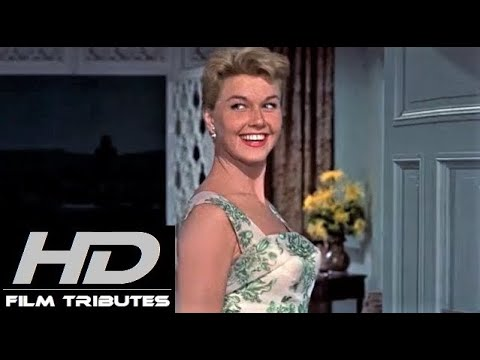

In [25]:
#https://youtu.be/i9nWB5XifBI
# Doris Day

from IPython.display import YouTubeVideo
YouTubeVideo("i9nWB5XifBI")

# Associate Rule
---

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
# As before, the first feature, "Unnamed: 0", is the `index` column

url = "https://datascience.quantecon.org/assets/data/chipotle_raw.csv.zip"

# use the first column as index
chipotle = pd.read_csv(url,index_col=0)

In [28]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
 5   total_value         4622 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 252.8+ KB


In [29]:
chipotle.describe()

,order_id,quantity,item_price,total_value
count,4622.000000,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336,8.489186
std,528.890796,0.410186,4.245557,12.632060
min,1.000000,1.000000,1.090000,1.090000
25%,477.250000,1.000000,3.390000,3.990000
50%,926.000000,1.000000,8.750000,8.750000
75%,1393.000000,1.000000,9.250000,10.980000
max,1834.000000,15.000000,44.250000,663.750000


In [30]:
chipotle.head(2)

,order_id,quantity,item_name,choice_description,item_price,total_value
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39


In [31]:
# delect Unnamed: 0

chipotle.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price,total_value
count,4622.000000,4622.000000,4622,3376,4622.000000,4622.000000
unique,NaN,NaN,50,1043,NaN,NaN
top,NaN,NaN,Chicken Bowl,[Diet Coke],NaN,NaN
freq,NaN,NaN,726,134,NaN,NaN
mean,927.254868,1.075725,NaN,NaN,7.464336,8.489186
std,528.890796,0.410186,NaN,NaN,4.245557,12.632060
min,1.000000,1.000000,NaN,NaN,1.090000,1.090000
25%,477.250000,1.000000,NaN,NaN,3.390000,3.990000
50%,926.000000,1.000000,NaN,NaN,8.750000,8.750000
75%,1393.000000,1.000000,NaN,NaN,9.250000,10.980000


In [3]:
# converting item_price to a float
chipotle["item_price"] = chipotle['item_price'].apply(lambda x: float(x[1:]))

chipotle.item_price.describe()

,item_price
count,4622.000000
mean,7.464336
std,4.245557
min,1.090000
25%,3.390000
50%,8.750000
75%,9.250000
max,44.250000


In [ ]:
chipotle["item_name"].value_counts()[:10]
#chipotle["item_name"].nunique()

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Chips,211
Steak Bowl,211
Bottled Water,162
Chicken Soft Tacos,115


In [ ]:
# Aummary above, showing the number of unique item_names
print("There are ", chipotle["item_name"].nunique(), " different items.")

There are  50  different items.


In [ ]:
# details of this data

print(f'There are {len(chipotle)} items in tatal {chipotle["order_id"].nunique()} orders.')

There are 4622 items in tatal 1834 orders.


# Questions

<font size=+1>

1. How many average items is it in each order?

In [32]:
## Answer here
len(chipotle)/chipotle["order_id"].nunique()

2.520174482006543

In [33]:
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price,total_value
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [4]:
# total comsuption of orders
chipotle['total_value']=chipotle['quantity']*chipotle['item_price']
chipotle.head(5)

,order_id,quantity,item_name,choice_description,item_price,total_value
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [ ]:
print(chipotle.groupby("order_id")["total_value"].sum().sort_values(ascending=False).head(3))

order_id
1443    1074.24
511      315.29
1559     246.00
Name: total_value, dtype: float64


Questions
---

<Large>

2. Why is the the reason that the maximum total comsumption of single order, `1413` order, occured above?

In [ ]:
print(chipotle.groupby("order_id")["quantity"].sum().sort_values(ascending=False).head(1))

order_id
1443    35
Name: quantity, dtype: int64



Associate Rules
---
<font size=+2>

1. Support($A$) = $\frac{\#(A_s)}{\#(\text{total items})}$, fraction of occurences;
2. Confidence = $P(A\to B)=P(B|A)=\frac{Supp(A\cap B)}{Supp(A)}$, the fraction `B` occurs if `A` occurs;
3. Lift $P(A\to B) = P(B|A)/P(B)$
, <br>i.e. ration of confident, $P(A|B)$. with respect to $Supp(B)$. It is better when this is greater than 1:
  - `lift` >1, i.e. $P(B|A)>P(B)$, B will more occur if A occurs than only B does.

In [5]:
!pip install -q mlxtend

```
                   count
   Index A IndexB.  ...

         ⬇︎  unstack()
               
               index B (features)
  Index A     
                count
```                

In [6]:
# Preview important columns
df = chipotle[['order_id', 'item_name']]

# Create basket: 1 if item is in order, else 0
basket = (
    df.groupby(['order_id', 'item_name'])['item_name']
    .count().unstack().reset_index().fillna(0)
    .set_index('order_id')
)

In [ ]:
df1=df.groupby(['order_id', 'item_name'])['item_name']
df1.describe()[-5:]

count unique                  top freq
order_id item_name                                                 
1831     Chips                   1      1                Chips    1
1832     Chicken Soft Tacos      1      1   Chicken Soft Tacos    1
         Chips and Guacamole     1      1  Chips and Guacamole    1
1833     Steak Burrito           2      1        Steak Burrito    2
1834     Chicken Salad Bowl      3      1   Chicken Salad Bowl    3

In [ ]:
chipotle.isna().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price,0
total_value,0


In [ ]:
df1.count()[:5]

order_id  item_name                            
1         Chips and Fresh Tomato Salsa             1
          Chips and Tomatillo-Green Chili Salsa    1
          Izze                                     1
          Nantucket Nectar                         1
2         Chicken Bowl                             1
Name: item_name, dtype: int64

In [ ]:
df2=df1.count().unstack()
df2.head(5)

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
basket

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1831,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Questions
---

<font size=+1>

3. What's the meaning, 1830 and 50?

In [8]:
# basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket = basket.astype(bool).astype(int)

In [34]:
basket[:5]

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Associaion
from mlxtend.frequent_patterns import apriori, association_rules

In [35]:
len(basket)

1834

In [36]:
# Find frequent itemsets with min_support

thread=0.005
frequent_itemsets = apriori(basket, min_support=thread, use_colnames=True)

In [14]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [15]:
rules.tail(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
115,(Chicken Bowl),"(Chips and Guacamole, Chips)",0.335333,0.009815,0.007088,0.021138,2.153749,1.0,0.003797,1.011568,0.805957,0.020968,0.011436,0.371680
116,"(Steak Bowl, Chicken Bowl)",(Chips and Guacamole),0.015812,0.258451,0.006543,0.413793,1.601048,1.0,0.002456,1.264995,0.381440,0.024440,0.209483,0.219555
117,(Chips and Guacamole),"(Steak Bowl, Chicken Bowl)",0.258451,0.015812,0.006543,0.025316,1.601048,1.0,0.002456,1.009751,0.506250,0.024440,0.009657,0.219555


In [16]:
# Sort by highest lift
rules = rules.sort_values('lift', ascending=False)

In [18]:
rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
100,(Chips and Tomatillo Red Chili Salsa),"(Canned Soft Drink, Chicken Bowl)",0.025082,0.060523,0.008179,0.326087,5.387779,1.0,0.006661,1.394062,0.835347,0.105634,0.282672,0.230611
97,"(Canned Soft Drink, Chicken Bowl)",(Chips and Tomatillo Red Chili Salsa),0.060523,0.025082,0.008179,0.135135,5.387779,1.0,0.006661,1.127249,0.866860,0.105634,0.112885,0.230611
80,"(Bottled Water, Chicken Bowl)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,1.0,0.011000,1.492061,0.748685,0.112450,0.329786,0.270206


In [17]:
# Show top rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
100,(Chips and Tomatillo Red Chili Salsa),"(Canned Soft Drink, Chicken Bowl)",0.008179,0.326087,5.387779
97,"(Canned Soft Drink, Chicken Bowl)",(Chips and Tomatillo Red Chili Salsa),0.008179,0.135135,5.387779
80,"(Bottled Water, Chicken Bowl)",(Chips),0.015267,0.405797,3.578038
81,(Chips),"(Bottled Water, Chicken Bowl)",0.015267,0.134615,3.578038
98,"(Chicken Bowl, Chips and Tomatillo Red Chili S...",(Canned Soft Drink),0.008179,0.517241,3.437031


In [19]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
100,(Chips and Tomatillo Red Chili Salsa),"(Canned Soft Drink, Chicken Bowl)",0.008179,0.326087,5.387779
97,"(Canned Soft Drink, Chicken Bowl)",(Chips and Tomatillo Red Chili Salsa),0.008179,0.135135,5.387779
80,"(Bottled Water, Chicken Bowl)",(Chips),0.015267,0.405797,3.578038
81,(Chips),"(Bottled Water, Chicken Bowl)",0.015267,0.134615,3.578038
98,"(Chicken Bowl, Chips and Tomatillo Red Chili S...",(Canned Soft Drink),0.008179,0.517241,3.437031


Summary
---

<font size=+2>

1. lift >1, $P(X ➡︎ Y)/P(Y)>1$: $X$ makes $Y$ more likely,
2. lift <1, P(X ➡︎ Y)/P(Y)<1: X makes Y less likely.

In [37]:
len(rules)

118

Rule Vizualization
---

In [20]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='antecedent support', ylabel='consequent support'>

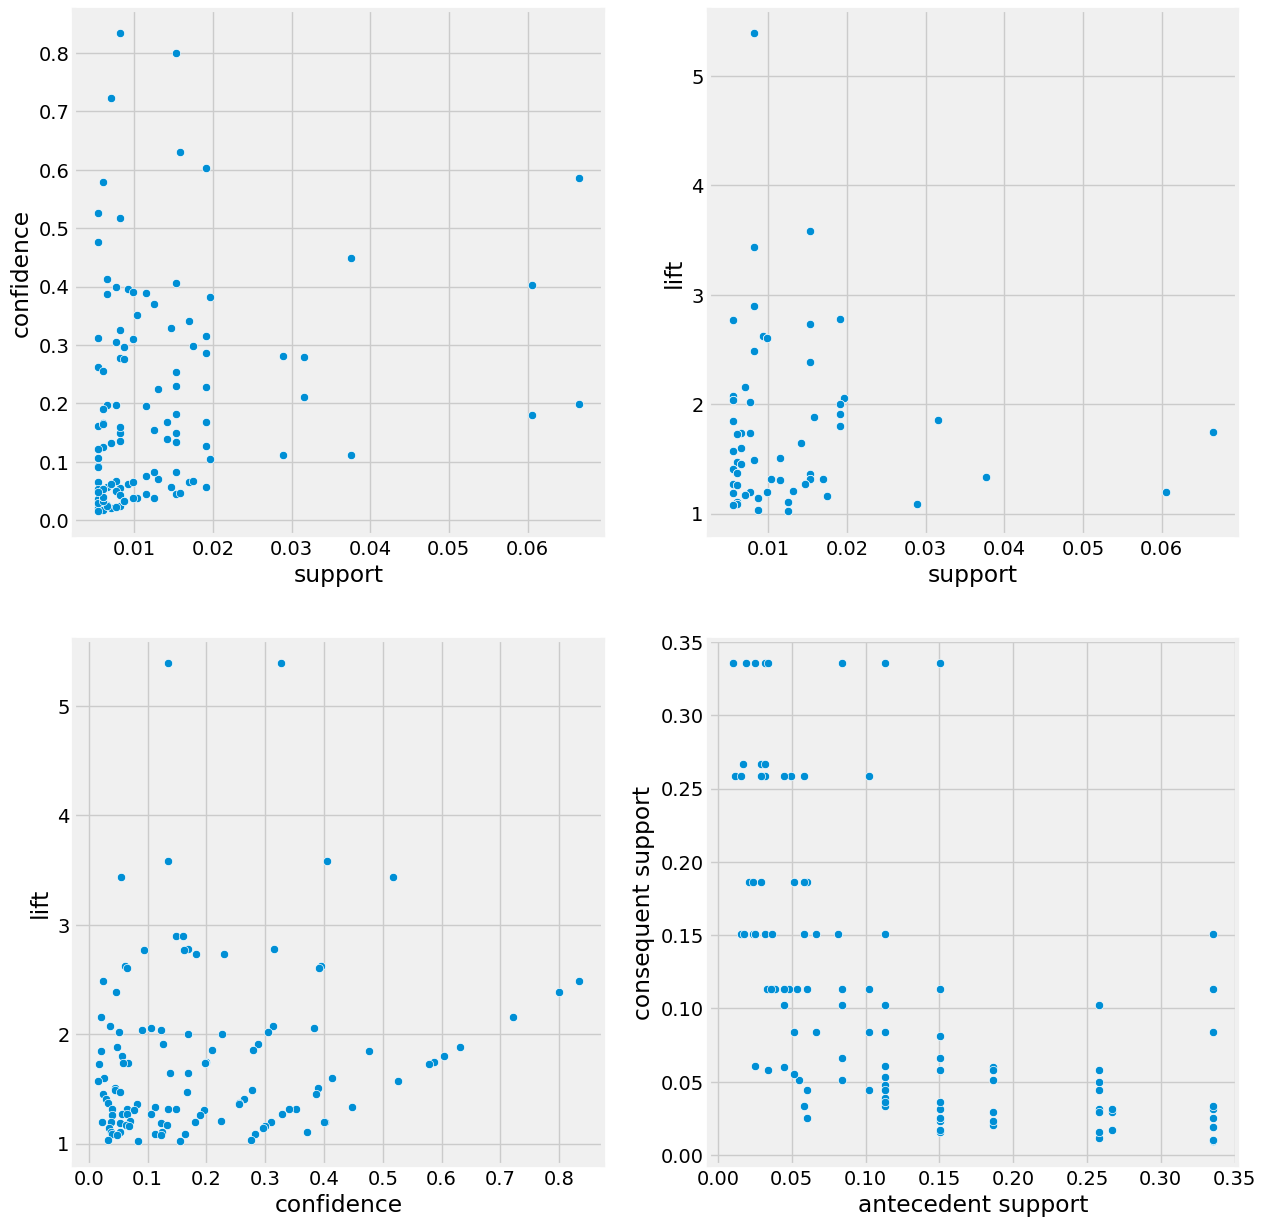

In [21]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('fivethirtyeight')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

<Big>

<font size=+1>

1. `Support` and `confidence` has a bleak linear relationship; but some some other items are associated.
2. When it come to `lift` the relationship (pic 12) is squashed in `support` when it goes beyond 0.02 and in `confidence`, (pic 21) there is no relationship.
3. In `antecedent` and `consequent` support relationship there is no linear relationship but it’s rather inverse;

In [ ]:
rules.sort_values(by='antecedent support').head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,lhs items,antecedents_,consequents_
114,"(Chips and Guacamole, Chips)",(Chicken Bowl),0.009815,0.335333,0.007088,0.722222,2.153749,1.0,0.003797,2.392803,0.541003,0.020968,0.582080,0.371680,2,"Chips and Guacamole,Chips",Chicken Bowl
96,"(Canned Soft Drink, Chips and Tomatillo Red Ch...",(Chicken Bowl),0.009815,0.335333,0.008179,0.833333,2.485095,1.0,0.004888,3.988004,0.603524,0.024272,0.749248,0.428862,2,"Canned Soft Drink,Chips and Tomatillo Red Chil...",Chicken Bowl
47,(Chips and Tomatillo-Red Chili Salsa),(Chicken Bowl),0.010360,0.335333,0.005998,0.578947,1.726487,1.0,0.002524,1.578585,0.425194,0.017657,0.366521,0.298417,1,Chips and Tomatillo-Red Chili Salsa,Chicken Bowl
84,"(Chips and Guacamole, Bottled Water)",(Chicken Bowl),0.010360,0.335333,0.005453,0.526316,1.569534,1.0,0.001979,1.403187,0.366667,0.016026,0.287336,0.271288,2,"Chips and Guacamole,Bottled Water",Chicken Bowl
108,"(Canned Soft Drink, Chicken Soft Tacos)",(Chips and Guacamole),0.011450,0.258451,0.005453,0.476190,1.842475,1.0,0.002493,1.415684,0.462548,0.020619,0.293627,0.248644,2,"Canned Soft Drink,Chicken Soft Tacos",Chips and Guacamole


Make network diagram of specified number of rules to see the antecedents and consequents connected to the rules

In [22]:
  import networkx as nx

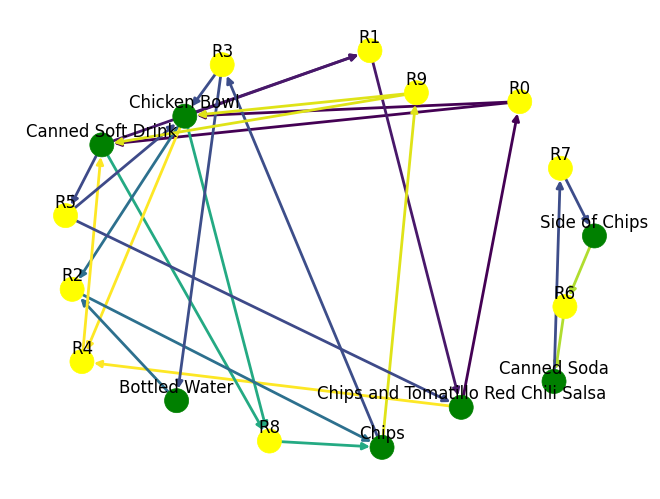

In [23]:
'''a function to build a network diagram connecting antecedents and consequents'''
def draw_graph(rules, rules_to_show):
  G1 = nx.DiGraph()

  color_map=[]
  N = 30
  colors = np.random.rand(N)
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']


  for i in range (rules_to_show):
    G1.add_nodes_from(["R"+str(i)])


    for a in rules.iloc[i]['antecedents']:

        G1.add_nodes_from([a])

        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

    for c in rules.iloc[i]['consequents']:

            G1.add_nodes_from([a])

            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

  for node in G1:
       found_a_string = False
       for item in strs:
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')



  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]

  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos,  node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)

  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

#Calling function with 10 rules
draw_graph(rules, 10)

Strength of association using heatmap
---

To discovered the association of items more better, consider to vizualize strength of their relationship coincidedly by `heatmap`:

```
      X1   X2   X3 ...
  Y1  w11  w12. w13

  Y2. w21. w22. w23
   . ..

```

Where $w_{ij}$ repesents the weight; here display it visualized.

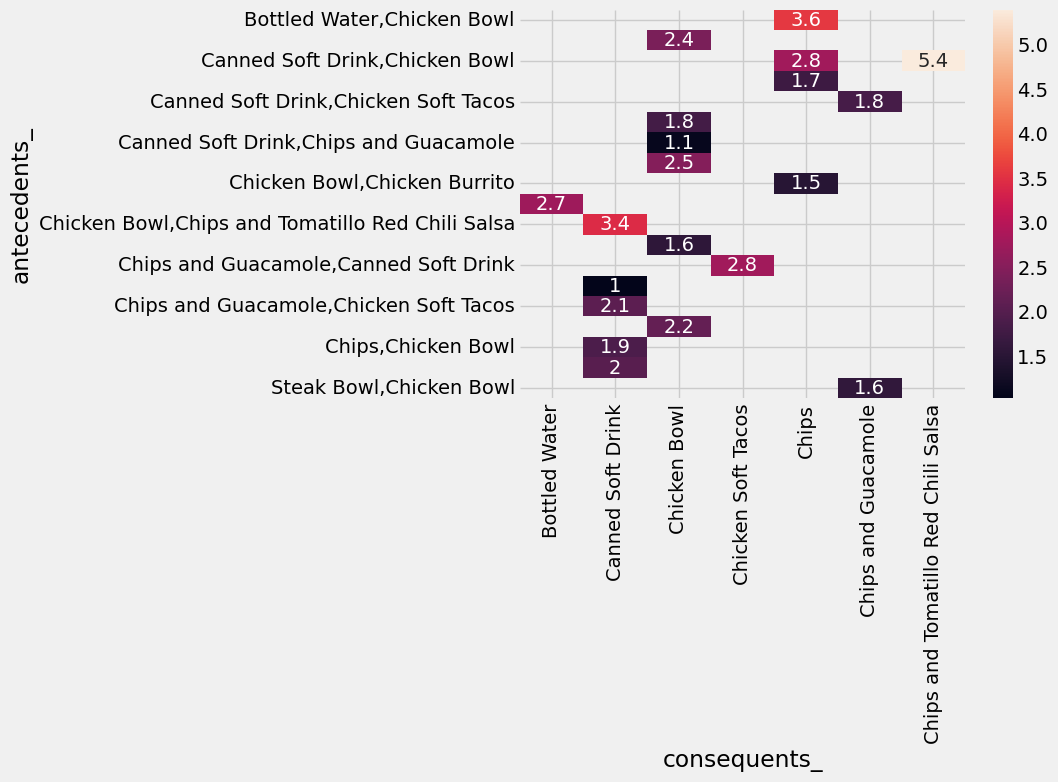

In [24]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_',
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_',
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90);